In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
data_dir = 'C:\\Users\\Admin\\Downloads\\dataset'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
test_path = data_dir+'\\test\\'

In [5]:
train_path = data_dir+'\\train\\'

In [6]:
test_path

'C:\\Users\\Admin\\Downloads\\dataset\\test\\'

In [7]:
train_path

'C:\\Users\\Admin\\Downloads\\dataset\\train\\'

In [8]:
os.listdir(train_path)

['cats', 'dogs']

In [9]:
os.listdir(train_path+'cats')[0]

'cat.1.jpg'

In [10]:
cat_im = train_path+'\\cats'+ '\\cat.1.jpg'

In [11]:
cat_image = imread(cat_im)

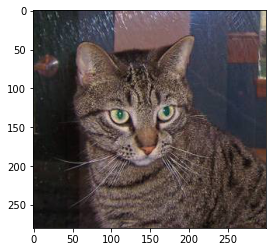

In [12]:
plt.imshow(cat_image)

In [13]:
os.listdir(train_path+'dogs')[0]

'dog.1.jpg'

In [14]:
dog_im = train_path+'\\dogs' + '\\dog.1.jpg'

In [15]:
dog_image = imread(dog_im)

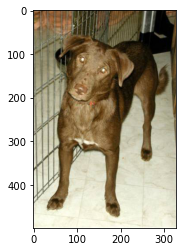

In [16]:
plt.imshow(dog_image)

In [17]:
len(os.listdir(train_path+'\\cats'))

4000

In [18]:
len(os.listdir(train_path+'\\dogs'))

4000

In [19]:
cat_image.shape

(280, 300, 3)

In [20]:
dog_image.shape

(499, 327, 3)

In [21]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\dogs'):
    
    img = imread(test_path+'\\dogs'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [22]:
np.mean(dim1)

365.171

In [23]:
np.mean(dim2)

396.317

In [41]:
image_shape = (150,150,3)

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               rescale=1/255, # Rescale the image by normalzing it.
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

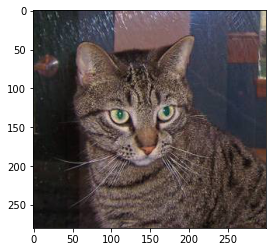

In [44]:
plt.imshow(cat_image)

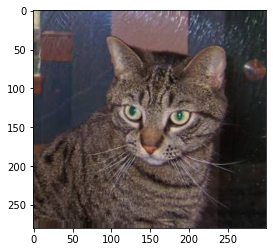

In [45]:
plt.imshow(image_gen.random_transform(cat_image))

In [46]:
image_gen.flow_from_directory(train_path)

Found 8000 images belonging to 2 classes.


In [47]:
image_gen.flow_from_directory(test_path)

Found 2000 images belonging to 2 classes.


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [49]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [53]:
batch_size = 16

In [54]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 8000 images belonging to 2 classes.


In [55]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 2000 images belonging to 2 classes.


In [56]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [57]:
results = model.fit_generator(train_image_gen,epochs=25,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/25
500/500 [==============================] - 321s 643ms/step - loss: 0.6601 - accuracy: 0.6034 - val_loss: 0.6396 - val_accuracy: 0.6555
Epoch 2/25
500/500 [==============================] - 316s 632ms/step - loss: 0.6269 - accuracy: 0.6488 - val_loss: 0.6231 - val_accuracy: 0.6675
Epoch 3/25
500/500 [==============================] - 314s 628ms/step - loss: 0.5875 - accuracy: 0.6948 - val_loss: 0.5497 - val_accuracy: 0.7225
Epoch 4/25
500/500 [==============================] - 313s 626ms/step - loss: 0.5594 - accuracy: 0.7080 - val_loss: 0.5702 - val_accuracy: 0.7035
Epoch 5/25
500/500 [==============================] - 549s 1s/step - loss: 0.5275 - accuracy: 0.7368 - val_loss: 0.5386 - val_accuracy: 0.7350
Epoch 6/25
500/500 [==============================] - 472s 943ms/step - loss: 0.5000 - accuracy: 0.7570 - val_loss: 0.4951 - val_accuracy: 0.7540
Epoch 7/25
500/500 [==============================] - 374s 747ms/step - loss: 0.4759 - accuracy: 0.7701 - val_loss: 0.4897 - va

In [58]:
losses = pd.DataFrame(model.history.history)

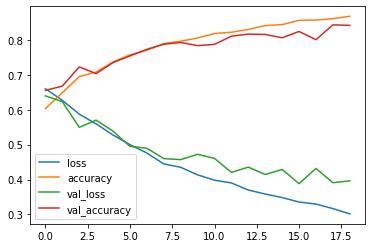

In [59]:
losses.plot()

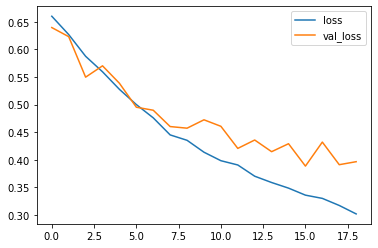

In [60]:
losses[['loss','val_loss']].plot()

In [62]:
from tensorflow.keras.preprocessing import image

In [65]:
predictions = model.predict_classes(test_image_gen)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(test_image_gen.classes,predictions))
confusion_matrix(test_image_gen.classes,predictions)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.83      0.84      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



array([[829, 171],
       [158, 842]], dtype=int64)

In [68]:
cat_im

'C:\\Users\\Admin\\Downloads\\dataset\\train\\\\cats\\cat.1.jpg'

In [69]:
my_image = image.load_img(cat_im,target_size=image_shape)

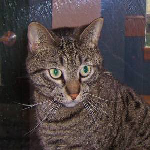

In [70]:
my_image

In [71]:
my_image = image.img_to_array(my_image)

In [72]:
type(my_image)

numpy.ndarray

In [73]:
my_image = np.expand_dims(my_image, axis=0)

In [74]:
my_image.shape

(1, 150, 150, 3)

In [75]:
model.predict_classes(my_image)

array([0], dtype=int64)

In [76]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [77]:
dog_im

'C:\\Users\\Admin\\Downloads\\dataset\\train\\\\dogs\\dog.1.jpg'

In [78]:
my_image1 = image.load_img(dog_im,target_size=image_shape)

In [79]:
my_image1 = image.img_to_array(my_image1)

In [80]:
my_image1 = np.expand_dims(my_image1, axis=0)

In [81]:
my_image1.shape

(1, 150, 150, 3)

In [82]:
model.predict_classes(my_image1)

array([1], dtype=int64)

In [83]:
os.listdir(test_path+'\\cats')[0]

'cat.4001.jpg'

In [84]:
ct_im = test_path+'\\cats'+ '\\cat.4001.jpg'

In [85]:
cat_test = imread(ct_im)

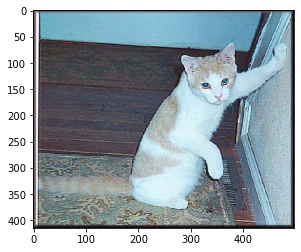

In [86]:
plt.imshow(cat_test)

In [87]:
ct_im

'C:\\Users\\Admin\\Downloads\\dataset\\test\\\\cats\\cat.4001.jpg'

In [88]:
my_image2 = image.load_img(ct_im,target_size=image_shape)

In [89]:
my_image2 = image.img_to_array(my_image2)

In [90]:
my_image2 = np.expand_dims(my_image2, axis=0)

In [91]:
my_image2.shape

(1, 150, 150, 3)

In [92]:
model.predict_classes(my_image2)

array([0], dtype=int64)